In [40]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

print("Libraries imported successfully")

Libraries imported successfully


In [41]:
df = pd.read_csv("apple_stock.csv")

print("Shape of dataset:", df.shape)
df.head()
df.info()
df.tail()

Shape of dataset: (11107, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11107 non-null  object 
 1   Adj Close   11107 non-null  float64
 2   Close       11107 non-null  float64
 3   High        11107 non-null  float64
 4   Low         11107 non-null  float64
 5   Open        11107 non-null  float64
 6   Volume      11107 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 607.5+ KB


,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000
11106,2025-01-03,243.860001,243.860001,244.179993,241.889999,243.369995,15135053


In [42]:
df = df.rename(columns={"Unnamed: 0": "Date"})
df['Date'] = pd.to_datetime(df['Date'])

print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [43]:
#Since no missing values, so no need to remove anything.
#adding new feature named price change percentage which shows how much the price of stock changed during the day between opening and closing

df['Pct_change'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df[['Date', 'Open', 'Close', 'Pct_change']].head()

,Date,Open,Close,Pct_change
0,1980-12-12,0.128348,0.128348,0.000000
1,1980-12-15,0.122210,0.121652,-0.456594
2,1980-12-16,0.113281,0.112723,-0.492577
3,1980-12-17,0.115513,0.115513,0.000000
4,1980-12-18,0.118862,0.118862,0.000000


In [44]:
data_np = df.to_numpy()
print("Shape of NumPy array:", data_np.shape)
print("Type:", type(data_np))
print(df.dtypes)

Shape of NumPy array: (11107, 8)
Type: <class 'numpy.ndarray'>
Date          datetime64[ns]
Adj Close            float64
Close                float64
High                 float64
Low                  float64
Open                 float64
Volume                 int64
Pct_change           float64
dtype: object


In [45]:
# Counting duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

date_dupes = df['Date'].duplicated().sum()
print("Number of duplicate dates:", date_dupes)

#df = df.drop_duplicates()

Number of duplicate rows: 0
Number of duplicate dates: 0


In [46]:
from sklearn.preprocessing import StandardScaler

# Create a copy so we don't overwrite the original
df_scaled_standard = df.copy()

scaler = StandardScaler()

# Select only numeric columns (exclude Date)
numeric_cols = ['Open','High','Low','Close','Adj Close','Volume','Pct_change']

df_scaled_standard[numeric_cols] = scaler.fit_transform(df_scaled_standard[numeric_cols])

# Preview results
df_scaled_standard.head()


,Date,Adj Close,Close,High,Low,Open,Volume,Pct_change
0,1980-12-12,-0.470674,-0.482508,-0.482727,-0.482369,-0.482626,0.458700,0.000044
1,1980-12-15,-0.470778,-0.482641,-0.482859,-0.482503,-0.482748,-0.416741,-0.200758
2,1980-12-16,-0.470916,-0.482819,-0.483036,-0.482683,-0.482926,-0.626253,-0.216583
3,1980-12-17,-0.470873,-0.482764,-0.482980,-0.482627,-0.482882,-0.683849,0.000044
4,1980-12-18,-0.470821,-0.482697,-0.482914,-0.482559,-0.482815,-0.722647,0.000044


In [47]:
from sklearn.model_selection import train_test_split

# Features (all numeric except Date and target)
X = df_scaled_standard.drop(columns=['Date', 'Close'])
y = df_scaled_standard['Close']

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (8885, 6) (8885,)
Testing set: (2222, 6) (2222,)


In [48]:
# 2. Exploratory Data Analysis (EDA) 

In [49]:
# Mean of each numeric column
print("Mean values:\n", df.mean(numeric_only=True))

# Median of each numeric column
print("\nMedian values:\n", df.median(numeric_only=True))

# Standard deviation of each numeric column
print("\nStandard deviation:\n", df.std(numeric_only=True))


Mean values:
 Adj Close     2.352223e+01
Close         2.435761e+01
High          2.459817e+01
Low           2.409261e+01
Open          2.433908e+01
Volume        3.154341e+08
Pct_change   -9.981323e-05
dtype: float64

Median values:
 Adj Close     4.466817e-01
Close         5.424110e-01
High          5.533930e-01
Low           5.345980e-01
Open          5.426790e-01
Volume        2.036944e+08
Pct_change    0.000000e+00
dtype: float64

Standard deviation:
 Adj Close     4.976788e+01
Close         5.021750e+01
High          5.069190e+01
Low           4.968263e+01
Open          5.016682e+01
Volume        3.348735e+08
Pct_change    2.273954e+00
dtype: float64


In [50]:
# Correlation matrix
corr = df.corr(numeric_only=True)

print(corr)


            Adj Close     Close      High       Low      Open    Volume  \
Adj Close    1.000000  0.999816  0.999752  0.999767  0.999694 -0.265350   
Close        0.999816  1.000000  0.999946  0.999946  0.999884 -0.264132   
High         0.999752  0.999946  1.000000  0.999929  0.999947 -0.263705   
Low          0.999767  0.999946  0.999929  1.000000  0.999945 -0.264549   
Open         0.999694  0.999884  0.999947  0.999945  1.000000 -0.264034   
Volume      -0.265350 -0.264132 -0.263705 -0.264549 -0.264034  1.000000   
Pct_change   0.020571  0.020632  0.018411  0.018473  0.016268  0.004622   

            Pct_change  
Adj Close     0.020571  
Close         0.020632  
High          0.018411  
Low           0.018473  
Open          0.016268  
Volume        0.004622  
Pct_change    1.000000  


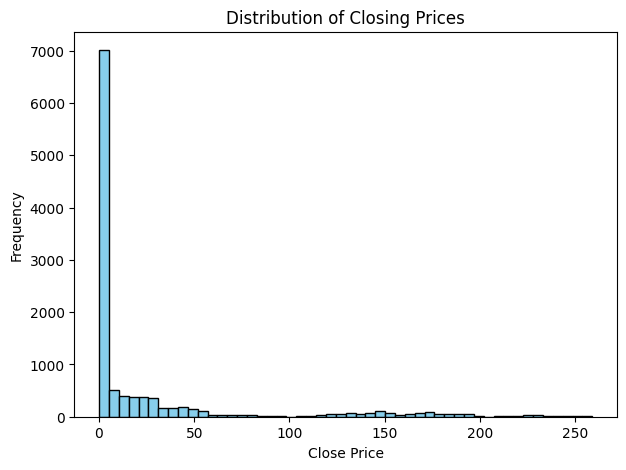

In [51]:
#Histograms-
plt.figure(figsize=(7,5))
plt.hist(df['Close'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Closing Prices")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()


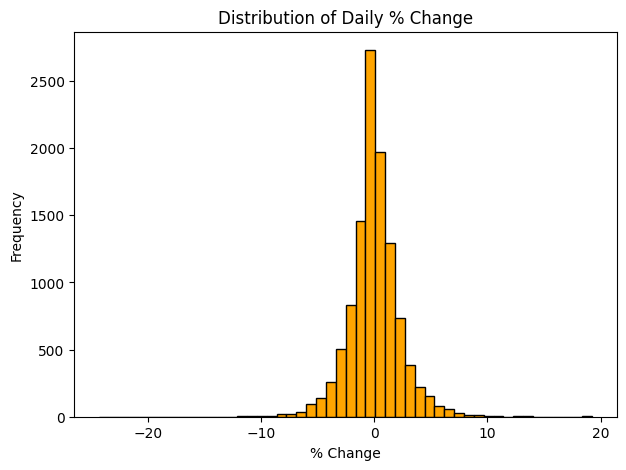

In [52]:
#Histogram for pct change
plt.figure(figsize=(7,5))
plt.hist(df['Pct_change'], bins=50, color='orange', edgecolor='black')
plt.title("Distribution of Daily % Change")
plt.xlabel("% Change")
plt.ylabel("Frequency")
plt.show()


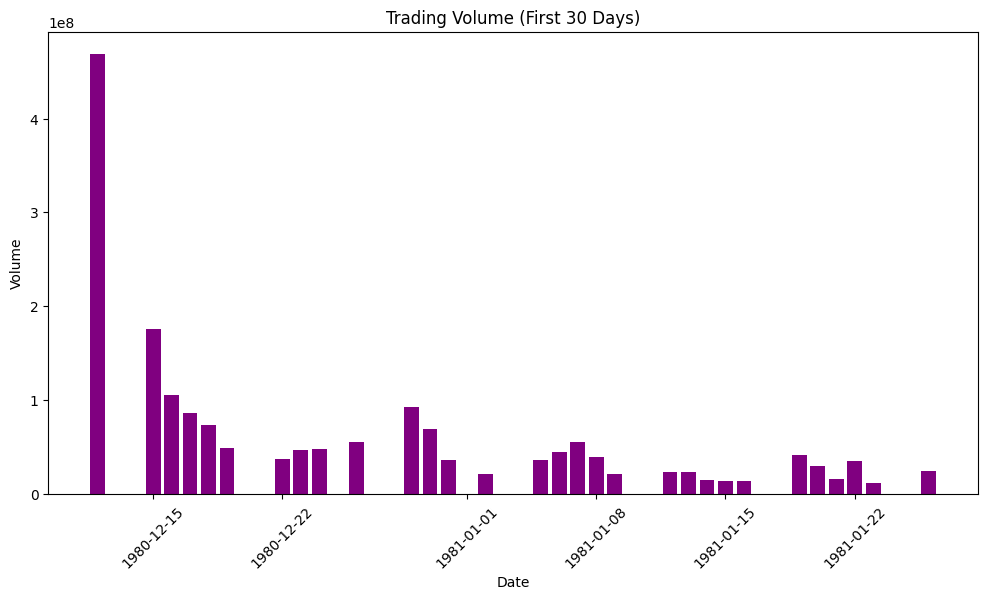

In [53]:
#Trading volume over time
plt.figure(figsize=(12,6))
plt.bar(df['Date'].head(30), df['Volume'].head(30), color='purple')  # first 30 days
plt.title("Trading Volume (First 30 Days)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=45)
plt.show()

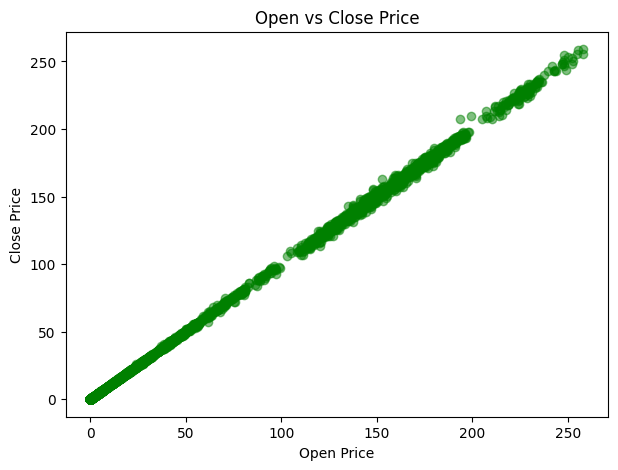

In [54]:
# relationship between open and close
plt.figure(figsize=(7,5))
plt.scatter(df['Open'], df['Close'], alpha=0.5, color='green')
plt.title("Open vs Close Price")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.show()

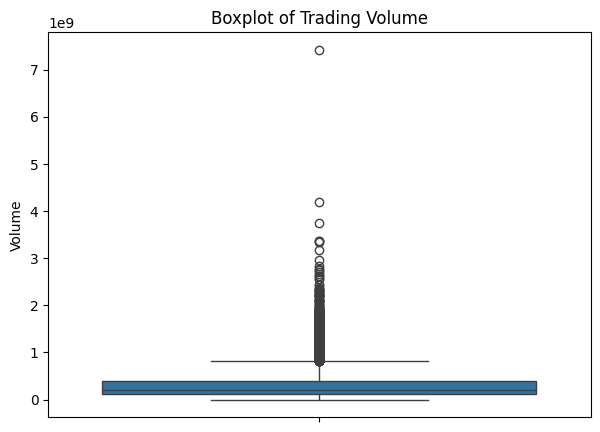

In [55]:
# Boxplot for volume
plt.figure(figsize=(7,5))
sns.boxplot(y=df['Volume'])
plt.title("Boxplot of Trading Volume")
plt.show()

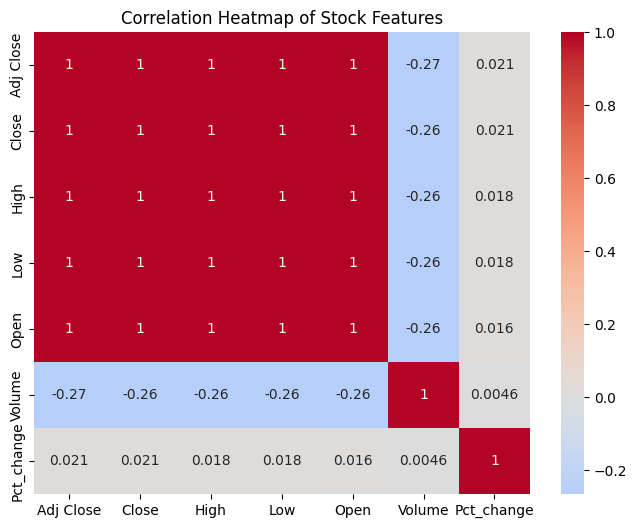

In [56]:
#correlation between all features through heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Stock Features")
plt.show()

In [57]:
from sklearn.impute import SimpleImputer

# Select numeric columns only
numeric_cols = ['Open','High','Low','Close','Adj Close','Volume','Pct_change']

# Create imputer (replace missing values with mean)
imputer = SimpleImputer(strategy='mean')

# Apply imputer
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

print("Missing values handled using sklearn SimpleImputer 😁")

Missing values handled using sklearn SimpleImputer 😁


In [58]:
# Add Movement column (Up = 1, Down = 0)
df['Movement'] = (df['Close'] > df['Open']).astype(int)

# Preview
df[['Date', 'Open', 'Close', 'Movement']].head(10)

print(df['Movement'].value_counts())

Movement
0    5988
1    5119
Name: count, dtype: int64


In [59]:
#using Use standard scaler and minmax scaler 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df_standard = df.copy()
df_standard[numeric_cols] = scaler.fit_transform(df_standard[numeric_cols])

mm_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = mm_scaler.fit_transform(df_minmax[numeric_cols])


In [60]:
#setting up classification model
# Drop rows where Close == Open (remove 'no movement')
df_bin = df[df['Close'] != df['Open']].copy()

# Features = numeric columns except Date, Close, Adj Close, and Movement
X_cls = df_bin.drop(columns=['Date', 'Close', 'Adj Close', 'Movement'])

# Target = Movement (0 = Down, 1 = Up)
y_cls = df_bin['Movement']

# Train-test split
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

print("Train shape:", X_train_cls.shape, y_train_cls.shape)
print("Test shape:", X_test_cls.shape, y_test_cls.shape)


Train shape: (8304, 5) (8304,)
Test shape: (2076, 5) (2076,)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cls, y_train_cls)
y_pred_log = log_reg.predict(X_test_cls)

print("Logistic Regression Accuracy:", accuracy_score(y_test_cls, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_cls, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_log))


Logistic Regression Accuracy: 0.47157996146435455

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1097
           1       0.47      1.00      0.64       979

    accuracy                           0.47      2076
   macro avg       0.24      0.50      0.32      2076
weighted avg       0.22      0.47      0.30      2076

Confusion Matrix:
 [[   0 1097]
 [   0  979]]


c:\TDS project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\TDS project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\TDS project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [62]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train_cls, y_train_cls)
y_pred_dt = dt.predict(X_test_cls)

print("Decision Tree Accuracy:", accuracy_score(y_test_cls, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_dt))


Decision Tree Accuracy: 1.0
Confusion Matrix:
 [[1097    0]
 [   0  979]]


In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_cls, y_train_cls)
y_pred_knn = knn.predict(X_test_cls)

print("KNN Accuracy:", accuracy_score(y_test_cls, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_knn))


KNN Accuracy: 0.5110789980732178
Confusion Matrix:
 [[541 556]
 [459 520]]


In [64]:
''' Logistic Regression collapsed and is always guessing 1
    Decesion tree classifier remembered the training data 
    KNN is performing fine but with a low accuracy of about 51.1%
'''

' Logistic Regression collapsed and is always guessing 1\n    Decesion tree classifier remembered the training data \n    KNN is performing fine but with a low accuracy of about 51.1%\n'

In [65]:
#setting up Linear regression
# Features: all numeric except Date and Close (since that's our target)
X_reg = df_standard.drop(columns=['Date', 'Close'])

# Target: Close price
y_reg = df_standard['Close']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Train shape:", X_train_reg.shape, y_train_reg.shape)
print("Test shape:", X_test_reg.shape, y_test_reg.shape)

Train shape: (8885, 7) (8885,)
Test shape: (2222, 7) (2222,)


In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Initialize and train model
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# Predictions
y_pred_reg = lin_reg.predict(X_test_reg)

# Evaluation metrics
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = root_mean_squared_error(y_test_reg, y_pred_reg)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Error (MAE): 0.00298803649718373
Root Mean Squared Error (RMSE): 0.006019896101754312


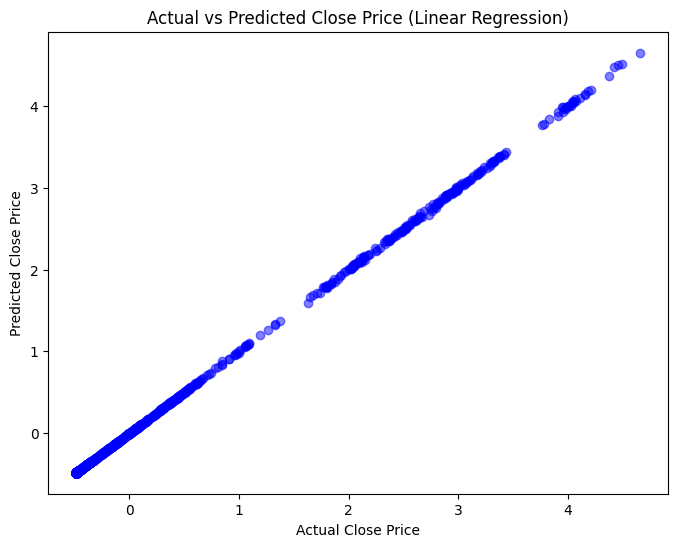

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5, color='blue')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price (Linear Regression)")
plt.show()


In [68]:
#we scaled the dataset that's why the error is so low, so for actual error we can scale all other features beside close which is our target

In [69]:
# Use unscaled Close as y
y_reg_unscaled = df['Close']   # actual prices

# Keep X as scaled
X_reg = df_standard.drop(columns=['Date','Close'])

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg_unscaled, test_size=0.2, random_state=42
)

lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = root_mean_squared_error(y_test_reg, y_pred_reg)

print("MAE in $:", mae)
print("RMSE in $:", rmse)


MAE in $: 0.15004496179608956
RMSE in $: 0.30229051132927376


In [70]:
'''In this project, we analyzed Apple’s stock data and built machine learning models.
 For classification (predicting if the stock goes up or down), the models did not perform very well — Logistic Regression
 always predicted “up”, KNN was close to random, and the Decision Tree overfitted. This shows that predicting daily 
 stock movements is very difficult. On the other hand, regression (predicting the closing price) worked much better.
 Our Linear Regression model gave very low errors (about 15–30 cents). However this is mostly because model probably
 learned that close is almost equal to open and that's why it isn't much applicable in real life stock market.'''

"In this project, we analyzed Apple’s stock data and built machine learning models.\n For classification (predicting if the stock goes up or down), the models did not perform very well — Logistic Regression\n always predicted “up”, KNN was close to random, and the Decision Tree overfitted. This shows that predicting daily \n stock movements is very difficult. On the other hand, regression (predicting the closing price) worked much better.\n Our Linear Regression model gave very low errors (about 15–30 cents). However this is mostly because model probably\n learned that close is almost equal to open and that's why it isn't much applicable in real life stock market."